In [1]:
from fsi_reader import FsiDataReader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from plotting import *

## Loading and Visualizing the Dataset

In this section, we will explore how to load the fluid-solid interaction simulation dataset and visualize it.

We will specifically load the simulation data for \( \mu = 1.0 \), where the inlet parameter \( x_1 = 0.0 \) and the all inlet parameters for \( x_2 \) will be considered as provided in the dataset.

Let's begin by loading the data and visualizing it to better understand its structure and behavior.


In [2]:
data = FsiDataReader('./fsi-data/', mu=['1.0'], in_lets_x1=['0.0'])
mesh = data.input_mesh
print(mesh.shape)

torch.Size([1317, 2])


In [3]:
data_loader = data.get_loader(batch_size=1, shuffle=False)

file not found for mu=1.0, x1=0.0, x2=-4.0
file not found for mu=1.0, x1=0.0, x2=-2.0
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 1])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 1])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 1])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 3])
Loaded tensor Size: torch.Size([1001, 1317, 1])
Loaded tensor Size: torch.Size([1001, 1317, 3])


## Visualization

In this section, we will visualize the pressure field from the fluid-solid interaction simulation dataset.

### **Loaded Variables**
The dataset includes the following variables for each time step `t`:

- `vx`, `vy`: The velocity components in the `x` and `y` directions, respectively.
- `P`: The pressure field.
- `dx`, `dy`: The displacement components in the `x` and `y` directions, respectively.

These variables are loaded and will be used to generate the visualizations.

### **Mesh Update**
The mesh, initially given as a 2D grid, is updated at each time step based on the displacement field. Specifically, the updated mesh at time `t` is:

`M_t = M_0 + d_t`

where `M_0` is the initial mesh, and `d_t` represents the displacement at time `t`.

### **Pressure Field Visualization**
Now, we will visualize the pressure field `P_t` overlaid on the updated mesh at each time step. This will help us understand how the pressure evolves and interacts with the deformed mesh over time.

Let's begin by plotting the pressure field and the updated mesh to observe their changes visually.



In [8]:
frames = 200
data_list = []
mesh_list = []
for idx, (i,j) in enumerate(data_loader):
    if idx%10 !=0:
        continue
    updated_mesh = mesh + i[0,:,-2:]
    data_list.append(i[:,:,2].numpy()) 
    mesh_list.append(updated_mesh.numpy())
    frames -= 1
    if frames == 0:
        break

Saving animation to fsi_animation_pressue.gif...


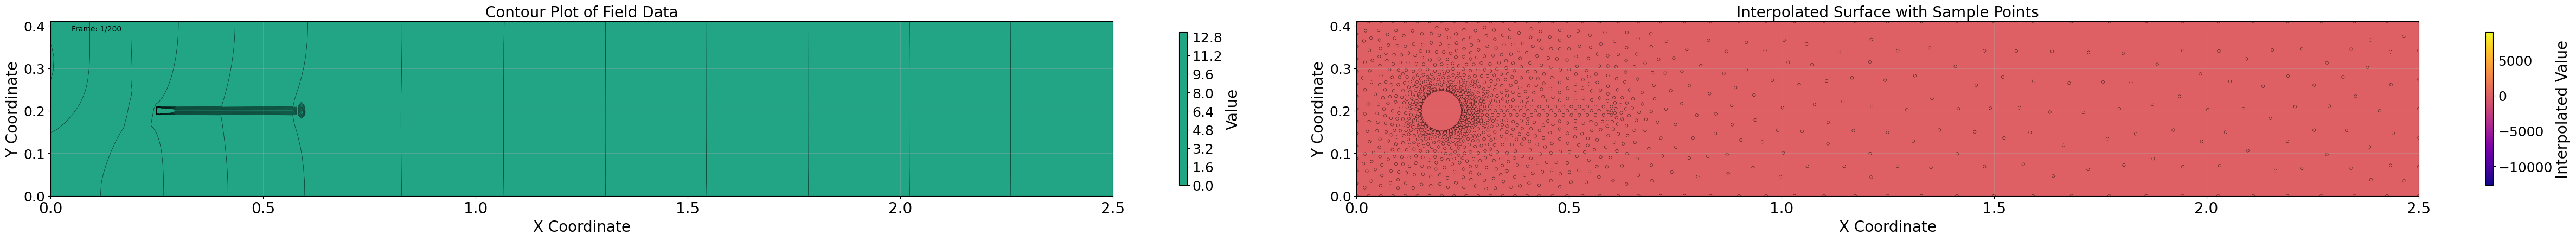

In [9]:
create_field_animation(data_list, mesh_list, interval=100, save_path='fsi_animation_pressue.gif')